<a href="https://www.kaggle.com/code/ylenialongo/junk-food?scriptVersionId=115590877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Setup Complete
/kaggle/input/burger-king-menu-nutrition-data/burger-king-menu.csv


In [2]:
king_filepath = "/kaggle/input/burger-king-menu-nutrition-data/burger-king-menu.csv"
king_data = pd.read_csv(king_filepath, index_col="Item", parse_dates=True)

In [3]:
king_data.head()

,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
Item,,,,,,,,,,,,,
Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0


In [4]:
list(king_data.columns)

['Category',
 'Calories',
 'Fat Calories',
 'Fat (g)',
 'Saturated Fat (g)',
 'Trans Fat (g)',
 'Cholesterol (mg)',
 'Sodium (mg)',
 'Total Carb (g)',
 'Dietary Fiber (g)',
 'Sugars (g)',
 'Protein (g)',
 'Weight Watchers']

<AxesSubplot:xlabel='Calories', ylabel='Cholesterol (mg)'>

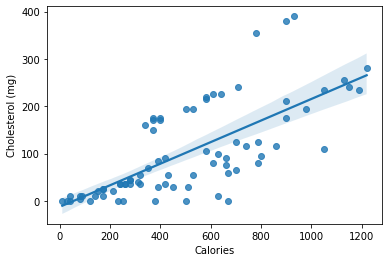

In [5]:
sns.regplot(x=king_data['Calories'], y=king_data['Cholesterol (mg)'])

Regular intake is proportionate to the calories (kcal) needed for a day: a 2,000 kcal/day diet shouldn't bring more than 250-300 mg/dl of cholesterol per day.

In [6]:
king_data[king_data.index.duplicated()]

,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
Item,,,,,,,,,,,,,
Chicken Nuggets- 4pc,Burgers,170.0,100.0,11.0,1.5,0.0,25.0,310.0,11.0,1.0,0.0,8.0,164.0
Chicken Nuggets- 6pc,Burgers,260.0,150.0,16.0,2.5,0.0,35.0,470.0,16.0,1.0,0.0,12.0,251.0
Hamburger,Burgers,240.0,90.0,10.0,3.5,0.5,35.0,380.0,26.0,1.0,6.0,13.0,237.0
Cheeseburger,Burgers,280.0,120.0,13.0,6.0,0.5,45.0,560.0,27.0,1.0,7.0,15.0,278.0


In [7]:
king_data = king_data[~king_data.index.duplicated()]

<AxesSubplot:xlabel='Saturated Fat (g)', ylabel='Count'>

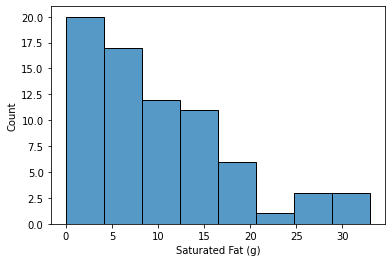

In [8]:
# Histogram 
sns.histplot(king_data['Saturated Fat (g)'])

There's a lot of saturated fat on Burger King's menus...not very healthy!

<AxesSubplot:xlabel='Sugars (g)', ylabel='Density'>

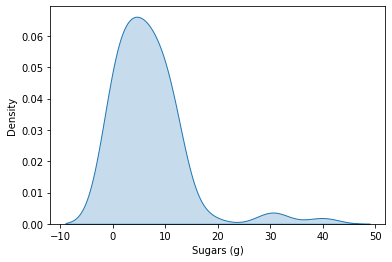

In [9]:
sns.kdeplot(data=king_data['Sugars (g)'], shade=True)

In [10]:
king_data.dtypes.sample(10)

Total Carb (g)       float64
Fat Calories         float64
Sugars (g)           float64
Weight Watchers      float64
Trans Fat (g)        float64
Fat (g)              float64
Sodium (mg)          float64
Dietary Fiber (g)    float64
Calories             float64
Saturated Fat (g)    float64
dtype: object

In [11]:
king_data['Category'].unique()

array(['Burgers', 'Chicken', 'Breakfast'], dtype=object)

Text(0.5, 1.0, 'Histogram of Sodium by Category')

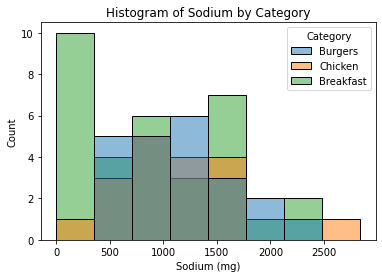

In [12]:
# Histograms for each category
sns.histplot(data=king_data, x='Sodium (mg)', hue='Category')

# Add title
plt.title("Histogram of Sodium by Category")

Excessive salt consumption causes an increase in blood pressure, with a consequent increase in the risk of the onset of serious cardio-cerebrovascular diseases.